In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(128, activation='relu'))

model.add(layers.Dense(5, activation='softmax'))

In [ ]:
from tensorflow.keras import optimizers
model.compile(loss='categorical_crossentropy',
optimizer=optimizers.RMSprop(learning_rate=1e-4),
metrics=['acc'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
'/content/drive/MyDrive/FLOWER PREPROCESSED/train',
target_size=(150, 150),batch_size=60,class_mode='categorical')

Found 2321 images belonging to 5 classes.


In [ ]:
validation_generator = validation_datagen.flow_from_directory(
    '/content/drive/MyDrive/FLOWER PREPROCESSED/validation',
      target_size=(150,150),batch_size=60,class_mode="categorical")

Found 997 images belonging to 5 classes.


In [ ]:
test_generator = test_datagen.flow_from_directory(
'/content/drive/MyDrive/FLOWER PREPROCESSED/test',target_size=(150, 150),
batch_size=60,
class_mode='categorical')

Found 495 images belonging to 5 classes.


In [ ]:
history = model.fit_generator(
train_generator,
steps_per_epoch=30,
epochs=20,
validation_data=validation_generator,
validation_steps=10)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
30/30 [==============================] - 10s 298ms/step - loss: 1.4946 - acc: 0.3245 - val_loss: 1.4419 - val_acc: 0.4083
Epoch 2/20
30/30 [==============================] - 9s 292ms/step - loss: 1.2515 - acc: 0.4683 - val_loss: 1.2940 - val_acc: 0.4667
Epoch 3/20
30/30 [==============================] - 9s 291ms/step - loss: 1.1639 - acc: 0.5194 - val_loss: 1.1923 - val_acc: 0.5150
Epoch 4/20
30/30 [==============================] - 9s 291ms/step - loss: 1.1041 - acc: 0.5553 - val_loss: 1.3537 - val_acc: 0.4467
Epoch 5/20
30/30 [==============================] - 9s 289ms/step - loss: 1.0725 - acc: 0.5733 - val_loss: 1.2714 - val_acc: 0.4833
Epoch 6/20
30/30 [==============================] - 9s 291ms/step - loss: 1.0378 - acc: 0.5828 - val_loss: 1.1460 - val_acc: 0.5300
Epoch 7/20
30/30 [==============================] - 9s 287ms/step - loss: 1.0054 - acc: 0.6042 - val_loss: 1.1337 - val_acc: 0.5383
Epoch 8/20
30/30 [==============================] - 9s 294ms/step - loss: 0

In [ ]:
model.save('flower_recognization_60_accuracy.h5')

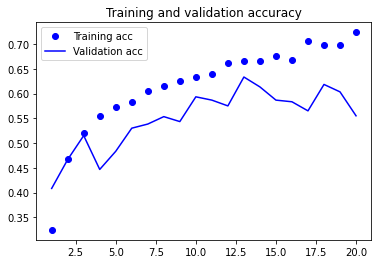

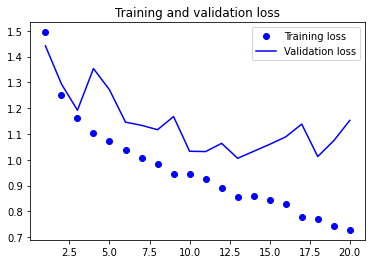

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

In [ ]:
img = image.load_img("/content/drive/MyDrive/FLOWER PREPROCESSED/test/dandelion/578938011_34918b1468.jpg", target_size=(150, 150))
x=image.img_to_array(img) / 255
resized_img_np = np.expand_dims(x,axis=0)
prediction = model.predict(resized_img_np)

In [ ]:
prediction

array([[0.08543869, 0.7409856 , 0.14204478, 0.00109416, 0.03043679]],
      dtype=float32)

In [ ]:
img = image.load_img("/content/drive/MyDrive/FLOWER PREPROCESSED/test/sunflower/2598973480_07de93e91d_n.jpg", target_size=(150, 150))
x=image.img_to_array(img) / 255
resized_img_np = np.expand_dims(x,axis=0)
prediction = model.predict(resized_img_np)

In [ ]:
prediction

array([[0.01803514, 0.02815951, 0.02405916, 0.88281983, 0.04692634]],
      dtype=float32)